In [1]:
import numpy as np

In [2]:
# # compute total makespan
# def calculate_completion_times(processing_times, sequence):
#     num_machines = processing_times.shape[1]
#     completion_times = np.zeros((len(sequence), num_machines))
#     for idx, order in enumerate(sequence):
#         for machine in range(num_machines):
#             if idx == 0:
#                 completion_times[idx, machine] = processing_times[order, machine]
#             else:
#                 if machine == 0:
#                     completion_times[idx, machine] = completion_times[idx-1, machine] + processing_times[order, machine]
#                 else:
#                     completion_times[idx, machine] = max(completion_times[idx, machine-1], completion_times[idx-1, machine]) + processing_times[order, machine]
#     total_completion_time = completion_times[-1, -1]
#     return total_completion_time

# compute the total sum of the completion times of all orders on all machines
def calculate_completion_times(processing_times, sequence):
    num_machines = processing_times.shape[1]
    completion_times = np.zeros((len(sequence), num_machines))
    total_completion_time = 0  # To hold the sum of all order completion times

    for idx, order in enumerate(sequence):
        for machine in range(num_machines):
            if idx == 0:
                completion_times[idx, machine] = processing_times[order, machine]
            else:
                if machine == 0:
                    completion_times[idx, machine] = completion_times[idx-1, machine] + processing_times[order, machine]
                else:
                    completion_times[idx, machine] = max(completion_times[idx, machine-1], completion_times[idx-1, machine]) + processing_times[order, machine]
            if machine == num_machines - 1:  # Last machine, so order is completed
                total_completion_time += completion_times[idx, machine]

    return total_completion_time  # Return the sum of completion times

In [3]:
def tabu_search(processing_times, num_iterations=100, tabu_size=5):
    num_orders = processing_times.shape[0]
    current_solution = np.random.permutation(num_orders)
    current_cost = calculate_completion_times(processing_times, current_solution)
    best_solution = np.copy(current_solution)
    best_cost = current_cost
    tabu_list = [current_solution.tolist()]

    for _ in range(num_iterations):
        neighborhood = []
        for i in range(num_orders):
            for j in range(i + 1, num_orders):
                neighbor = np.copy(current_solution)
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if neighbor.tolist() not in tabu_list:
                    neighborhood.append(neighbor)

        best_neighbor = None
        best_neighbor_cost = np.inf
        for neighbor in neighborhood:
            cost = calculate_completion_times(processing_times, neighbor)
            if cost < best_neighbor_cost:
                best_neighbor = neighbor
                best_neighbor_cost = cost

        current_solution = best_neighbor
        current_cost = best_neighbor_cost

        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        tabu_list.append(current_solution.tolist())
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        if best_cost == best_neighbor_cost:
            break

    return best_solution, best_cost

# Input processing times matrix
processing_times = np.array([
    [68, 59],
    [25, 65],
    [46, 28],
    [28, 92],
    [93, 93]
])

# Run tabu search 5 times
results = [tabu_search(processing_times) for _ in range(5)]
results


[(array([0, 1, 2, 3, 4]), 1052.0),
 (array([3, 1, 0, 2, 4]), 1062.0),
 (array([3, 2, 1, 0, 4]), 994.0),
 (array([3, 2, 1, 4, 0]), 1026.0),
 (array([3, 1, 0, 2, 4]), 1062.0)]

In [4]:
processing_times = np.array([
    [ 6, 47, 52, 80, 73, 57, 12, 83, 66,  6],
    [42, 81, 98, 63, 86, 47, 41, 29, 21, 30],
    [28, 19, 52, 43, 87, 29, 46, 96, 16, 58],
    [66, 52, 13, 40,  8, 97, 26, 94, 86, 76],
    [56, 79, 52, 62, 80, 66, 98, 31, 34, 71],
    [90, 43, 64, 17, 83, 16, 95, 34, 79, 87],
    [44, 20, 28, 52, 53, 61, 66, 79,  1, 90],
    [71, 79, 37, 70, 58, 87, 65, 73, 31, 72],
    [44, 57, 72, 85, 35, 80, 60, 37,  4, 51],
    [33, 27,  9, 37, 68, 34, 71, 13, 77,  5],
    [65, 58, 67, 71, 96, 80,  3, 66, 56, 74],
    [19, 50, 27, 32, 48, 39, 44, 82, 95, 32]
])

# Run tabu search 5 times
results = [tabu_search(processing_times) for _ in range(5)]
results

[(array([ 6, 11,  5,  0,  7,  4,  8, 10,  9,  2,  3,  1]), 10793.0),
 (array([ 1, 11,  5,  9,  6,  8,  2, 10,  4,  3,  7,  0]), 10405.0),
 (array([ 9,  0,  2,  1, 11,  8,  7,  6,  5,  3, 10,  4]), 10530.0),
 (array([10, 11,  9,  5,  0,  3,  6,  2,  4,  8,  1,  7]), 10768.0),
 (array([ 6,  0,  8,  9,  1, 11,  4,  2, 10,  7,  3,  5]), 10620.0)]

In [5]:
def read_file_input(filepath):
    with open(filepath) as f:
        lines = f.readlines()
        sizes = [int(nr) for nr in lines[0].split()]
        m, n = sizes[0], sizes[1]
        arr = np.zeros((n, m))

        for i in range(1, len(lines)):
            arr[i-1, :] = [int(nr) for nr in lines[i].split()]

    return arr


arr = read_file_input("../../data/jss/imrg/ds1/testbed_1_s/t1s_0001.txt")
arr

array([[ 1., 68.],
       [59., 25.],
       [65., 46.],
       [28., 28.],
       [92., 93.]])

In [6]:
tabu_search(arr)

(array([0, 3, 4, 2, 1]), 923.0)

In [7]:
%matplotlib inline
import random, numpy, math, copy, matplotlib.pyplot as plt
import numpy as np

class City:
    """class for the coordinates of a location """
    def __init__(self, coords):
        self.x = int(coords[0])
        self.y = int(coords[1])
    
    def distance(self, city):
        """
        Euclidean distance between two locations
        """
        xDis = self.x - city.x
        yDis = self.y - city.y
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    
    #def getCoord(self):
    #    return [self.x, self.y]

class TSP:
    def __init__(self, filename = None, cities_no = 10):
        """
         random generation of location coordinates / reading data from a .tsp file 
        """
        if filename is None:
            self.N = cities_no
            self.cities = [City(random.sample(range(100), 2)) for i in range(self.N)];
        else:
            self.N, self.cities = self.___read_TSP_file(filename)
        
    def ___read_TSP_file(self, filename):
        nodelist = []

        # Open input file
        with open(filename, 'r') as infile:

            # Read instance header
            Name = infile.readline().strip().split()[1] # NAME
            FileType = infile.readline().strip().split()[1] # TYPE
            Comment = infile.readline().strip().split()[1] # COMMENT
            Dimension = infile.readline().strip().split(":")[1] # DIMENSION
            EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
            infile.readline()

            # Read node list
            N = int(Dimension)
            for i in range(N):
                coords = infile.readline().strip().split()[1:]
                nodelist.append(City(coords))

        return N, nodelist
    
    def eval(self, tour):
        """computation of a tour cost"""
        val = 0
        for i in range(self.N-1):
            val += self.cities[tour[i]].distance(self.cities[tour[i+1]])
        val += self.cities[tour[0]].distance(self.cities[tour[self.N-1]])
        return val
    
    def displayTour(self, tour):
        """plot the tour"""
        
        plt.figure(figsize = (16,8))

        plt.axes()
        plt.plot([self.cities[tour[i % self.N]].x for i in range(self.N+1)], [self.cities[tour[i % self.N]].y for i in range(self.N+1)], 'bo-')
        plt.show()
    
    def init_solution(self):
        """initial solution - random perturbation"""
        return random.sample(range(self.N), self.N)

    def perturb_solution(self, S):
        """2-opt perturbation"""
        i, j = random.sample(range(self.N),2)
        if i > j: i,j=j,i
        new_S = S.copy()
        for k in range((j-i)//2):
            new_S[i+k],new_S[j-k]=new_S[j-k],new_S[i+k]
        return new_S

[[42, 14, 56, 40, 21, 73, 20, 72, 71, 74, 55, 22, 66, 38, 3, 24, 54, 53, 23, 79, 67, 76, 2, 78, 28, 77, 33, 70, 65, 64, 34, 8, 80, 32, 49, 75, 11, 25, 27, 50, 19, 31, 29, 69, 0, 68, 26, 100, 52, 39, 57, 1, 96, 86, 94, 12, 93, 58, 98, 92, 91, 36, 97, 84, 60, 83, 4, 82, 59, 88, 17, 5, 95, 51, 87, 30, 9, 61, 18, 10, 89, 62, 63, 48, 35, 46, 47, 6, 81, 7, 44, 45, 16, 85, 37, 13, 15, 43, 90, 99, 41], [42, 14, 56, 40, 21, 73, 20, 72, 71, 74, 55, 22, 66, 38, 3, 24, 54, 53, 23, 79, 67, 76, 2, 78, 28, 77, 33, 70, 65, 64, 34, 8, 80, 32, 49, 75, 11, 25, 27, 50, 19, 31, 29, 69, 0, 68, 26, 100, 52, 39, 57, 1, 96, 86, 94, 12, 93, 58, 98, 92, 91, 36, 97, 84, 60, 83, 4, 82, 59, 88, 17, 5, 95, 51, 87, 30, 9, 61, 18, 10, 89, 62, 63, 48, 35, 46, 47, 6, 81, 7, 44, 45, 16, 85, 15, 13, 37, 43, 90, 99, 41], [42, 14, 56, 40, 21, 73, 20, 72, 71, 74, 55, 22, 66, 38, 3, 24, 54, 53, 23, 79, 67, 76, 2, 78, 28, 77, 33, 34, 65, 64, 70, 8, 80, 32, 49, 75, 11, 25, 27, 50, 19, 31, 29, 69, 0, 68, 26, 100, 52, 39, 57, 1, 

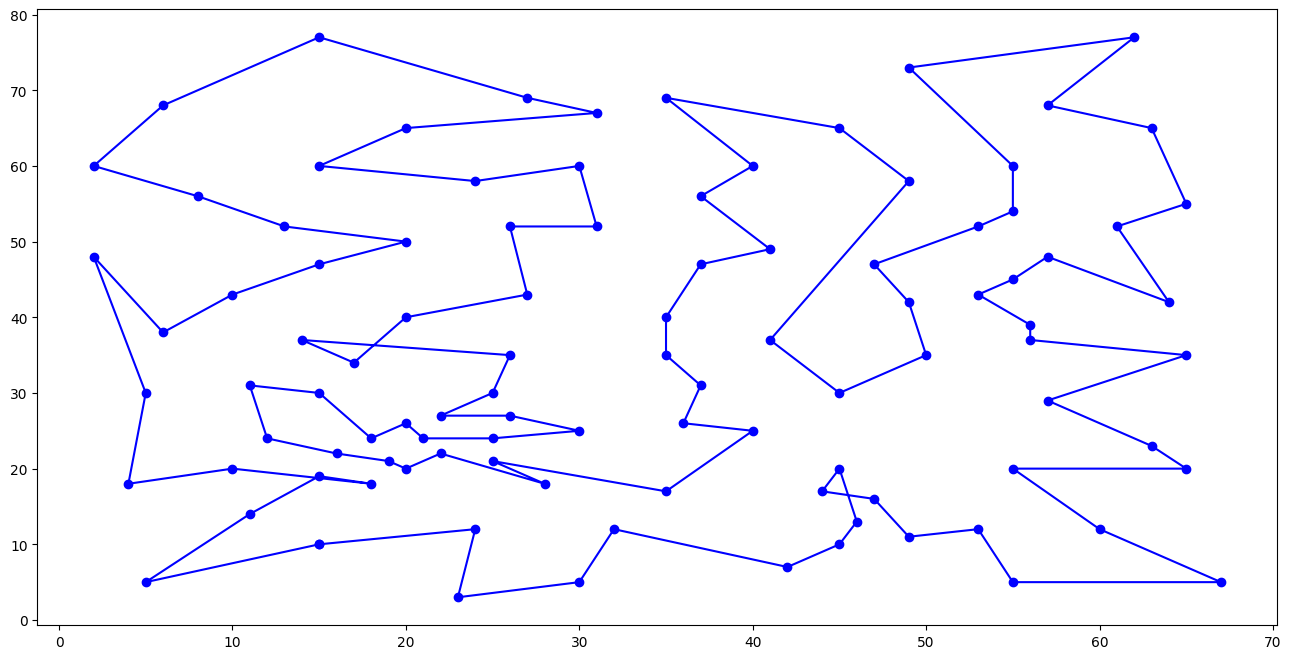

best 734.1522161224653


In [8]:
# Remark: other implementations: https://www.techconductor.com/algorithms/python/Search/Tabu_Search.php


def ElementInTabuList(el, TabuList):
    '''
    :param el current element (to be searched in the TabuList)
    :param TabuList - list with "forbidden" elements

    :return True if el is in TabuList and False otherwise
    '''
    dim = list(range(len(el)))
    for a in TabuList:
        found = True
        for i in dim:
            if el[i] != a[i]:
                found = False
                break
        if found:
            return True;
    return False

def PerturbTabuSearch(prob, S, cost_S, TabuList, dimNeighborhood, TabuListMaxSize):
    '''
    :param prob - problem to be solved
    :param S - current candidate solution
    :param cost_S - cost of S
    :param TabuList - list  with "forbidden" elements
    :param dimNeighborhood - size of the neighborhood
    :param TabuListMaxSize - maximal size of the TabuList

    :return new candidate solution and update TabuList
    '''    
    C = prob.perturb_solution(S) # element din vecinătatea lui S
    cost_C = prob.eval(C)
    # genereaza candidați și îl selectează pe cel mai bun care nu e in tabuList
    for i in range(dimNeighborhood-1):
        el = prob.perturb_solution(S)
        cost_el = prob.eval(el) # generează un nou candidat
        if (not ElementInTabuList(el,TabuList)) and cost_el < cost_C: 
            C = el.copy()
            cost_C = cost_el

    if cost_C < cost_S:  # doesn't take in account feasibility
        S = C.copy()
        cost_S = cost_C
        if len(TabuList) > TabuListMaxSize:
            TabuList.pop(0)
        TabuList.append(S)

    return S, cost_S, TabuList

def TabuSearch(prob, max_iter=1000, dimNeighborhood = 20, TabuListMaxSize=10):
    S = prob.init_solution()
    cost_S = prob.eval(S)
    Best=S.copy()
    cost_Best = cost_S
    TabuList=[] 
    TabuList.append(S.copy()) 
    it=1
    while it < max_iter:
        S, cost_S, TabuList = PerturbTabuSearch(prob, S, cost_S, TabuList, dimNeighborhood, TabuListMaxSize)
        if cost_S < cost_Best:
            Best = S.copy(); 
            cost_Best = cost_S
        it=it+1
    print (TabuList)
    return Best, cost_Best

# prob = Knapsack(20, [3,4,1,5,2], [10,8,3,6,5])
prob = TSP("../../data/tsp/eil101.tsp")
S, best = TabuSearch(prob,dimNeighborhood=prob.N)
print(best,S)
prob.displayTour(S)
print("best", best)